# Linear Regression 

Load the data from the file *trajectory.csv*. The data consists of three rows representing a trajectory. The first row represents time, the second row represents the $x$-coordinate at each timestep, and the third row represents the $y$-coordinate.


### STEP 1:
Plot the $x$-coordinate against time (i.e., t-x figure) and also for the $y$-coordinate (i.e., t-y figure). Also plot the trajectory in 2D (i.e., x-y figure).

The variables 't', 'x', 'y' are used to represent time, x-coordinate, and y-coordinate.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("trajectory.csv")
print(data.head())

df = data.T
df=df.iloc[1:]
df.columns = ['t','x','y']
df.reset_index(drop=True, inplace=True)

print(df)

  Unnamed: 0         0         1         2         3         4         5  \
0          t  0.005000  0.010000  0.015000  0.020000  0.025000  0.030000   
1          x -7.734807 -7.734807 -7.734807 -7.734807 -7.734813 -7.734788   
2          y -8.091068 -8.091068 -8.091068 -8.091069 -8.091079 -8.091037   

          6         7         8  ...       190       191       192       193  \
0  0.035000  0.040000  0.045000  ...  0.955000  0.960000  0.965000  0.970000   
1 -7.734843 -7.734794 -7.734569  ...  3.572669  3.572758  3.572745  3.572742   
2 -8.091129 -8.091048 -8.090664  ... -1.225920 -1.225919 -1.225919 -1.225919   

        194       195       196       197       198       199  
0  0.975000  0.980000  0.985000  0.990000  0.995000  1.000000  
1  3.572745  3.572744  3.572744  3.572744  3.572744  3.572744  
2 -1.225919 -1.225919 -1.225919 -1.225919 -1.225919 -1.225919  

[3 rows x 201 columns]
         t         x         y
0    0.005 -7.734807 -8.091068
1     0.01 -7.734807 -8.091068
2

In [2]:
t = df['t']
x = df['x']
y = df['y']

Text(0.5, 1.0, 'x-coordinate against time')

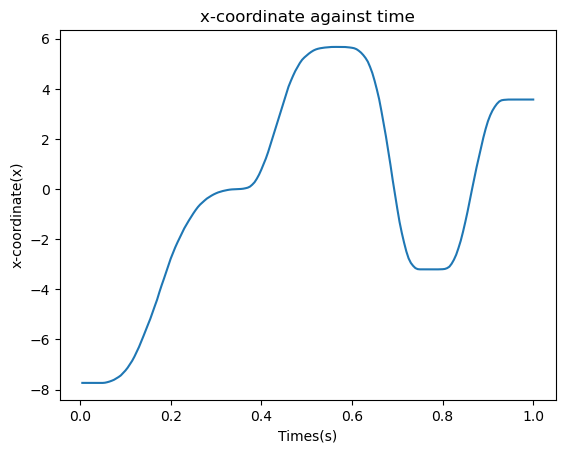

In [3]:
plt.plot(t,x)
plt.xlabel('Times(s)')
plt.ylabel('x-coordinate(x)')
plt.title('x-coordinate against time')

Text(0.5, 1.0, 'y-coordinate against time')

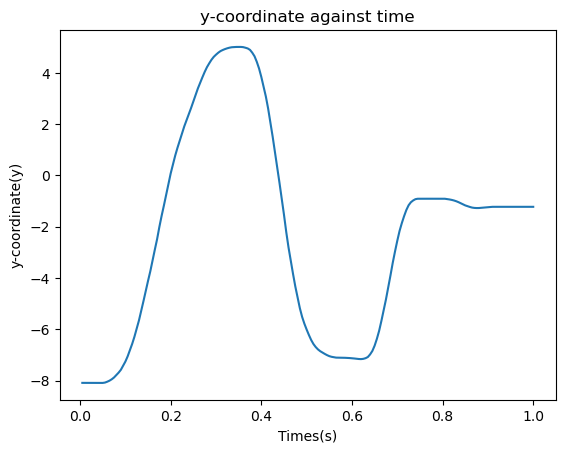

In [4]:
plt.plot(t,y)
plt.xlabel('Times(s)')
plt.ylabel('y-coordinate(y)')
plt.title('y-coordinate against time')

Text(0.5, 1.0, '2D Trajectory')

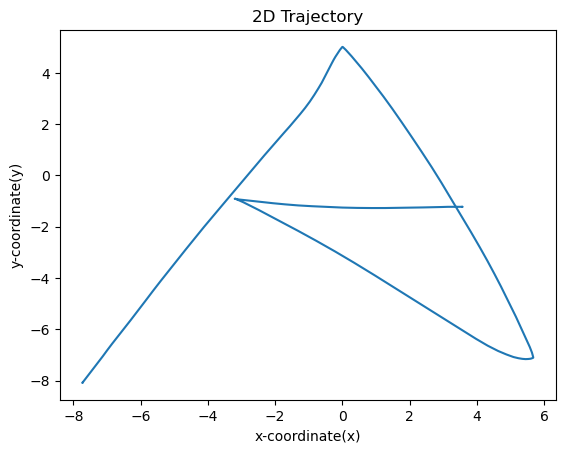

In [5]:
plt.plot(x,y)
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('2D Trajectory')

### Linear regression using two different sets of basis functions
 
The following code blocks show two attempts to perform linear regression. The only difference is the choice of basis functions. The first one is based on exponential:

In [6]:
import numpy as np
basis_num = 50 # number of basis functions

def exponential_basis_function(t, basis_num):
    c = np.zeros(basis_num)  # centers of basis functions
    h = np.zeros(basis_num)  # widths of basis functions
    for i in range(basis_num):
        c[i] = 1.0 / basis_num * i
        h[i] = 50
    res = np.exp(-h * (t - c) ** 2)
    return res

def fit_exponential(basis_num, t):
    phi_pred = np.zeros((len(t), basis_num))    # shape: 200 * basis_num 
    for idx, tt in enumerate(t):
        phi = exponential_basis_function(tt, basis_num)
        addsum = np.sum(phi, axis=-1)
        phi_pred[idx] = phi / addsum
    return phi_pred

The second one uses polynomials as basis functions:

In [7]:
def polynomial_basis_function(t):
    # a polynomial basis function
    res1 = np.ones_like(t)
    res2 = t
    res3 = t**2
    res4 = t**3
    res = np.stack([res1, res2, res3, res4]).T
    return res

Fit the 2-D trajectory using exponential basis functions and predict a 2-D trajectory [x y] for all time inputs t

In [8]:
Phi = fit_exponential(basis_num, t)  
pos = np.stack([x, y]).T
w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ pos
predict_pos = Phi @ w

## STEP 2

b1. The correct predictions for the exponential basis functions have already been provided above. Employ linear regression to fit the trajectories with polynomial basis functions (defined by 'polynomial_basis_function(t)').

b2. Plot the $x$-coordinate of the original data set against time (i.e., t-x plot) in one figure. Do the same for the $y$-coordinate (i.e., t-y plot) in another figure. Now overlay the predictions using the exponential basis functions (i.e., plot "predicted x against t" and "original x against t" in the same figure, plot "predicted y against t" and "original y against t" in the same figure). Do the same for the predictions based on the polynomial basis functions.

b3. Also plot the 2D (i.e., x-y) trajectory of the original data and the predicted 2D trajectories for the exponential and polynomial basis functions.

In [9]:
#PART B1
def fit_polynomial(t):
    phi_pred = np.zeros((len(t), 4))    
    for idx, tt in enumerate(t):
        phi = polynomial_basis_function(tt)
        addsum = np.sum(phi, axis=-1)
        phi_pred[idx] = phi / addsum
    return phi_pred

In [10]:
#EXPONENTIAL
#FIT TRAJECTORIES WITH EXPONENTIAL BASIS FUNCTION

expo_phi_pred_x = fit_exponential(basis_num, t)
expo_w_x = np.linalg.pinv(expo_phi_pred_x.T @ expo_phi_pred_x) @ expo_phi_pred_x.T @ x 
predicted_x = expo_phi_pred_x @ expo_w_x #Predict x values

expo_phi_pred_y = fit_exponential(basis_num, t)
expo_w_y = np.linalg.pinv(expo_phi_pred_y.T @ expo_phi_pred_y) @ expo_phi_pred_y.T @ y
predicted_y = expo_phi_pred_y @ expo_w_y #Predict y values

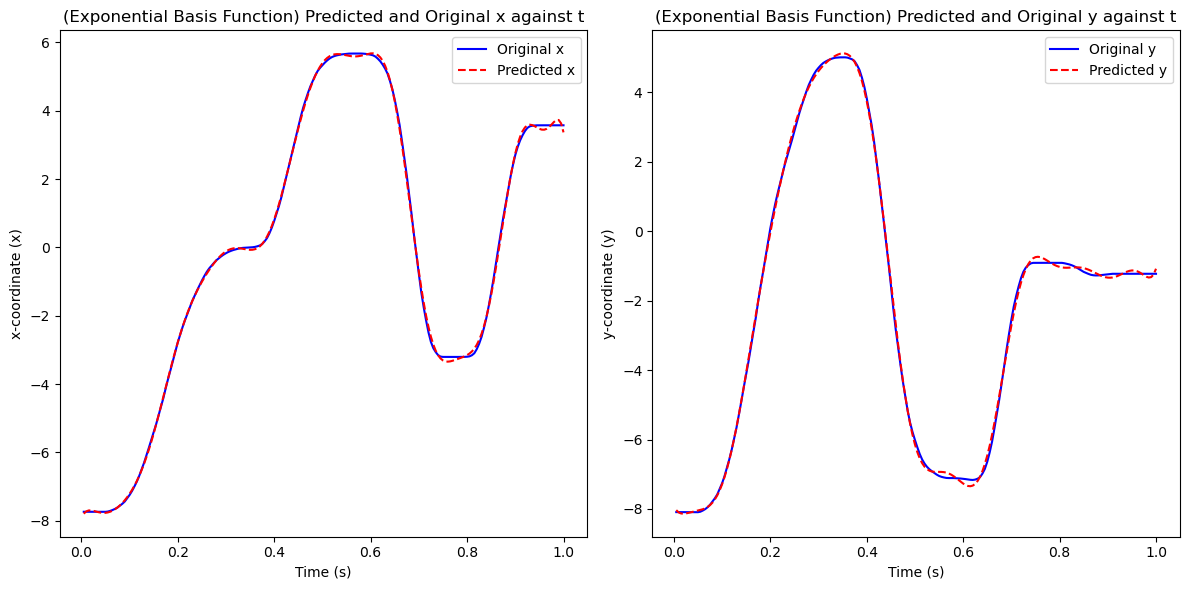

In [11]:
#PART B2
# EXPONENTIAL - Plot original and predicted x-coordinate vs time
plt.figure(figsize=(12, 6))

# Plot t-x (original and predicted)
plt.subplot(1, 2, 1)
plt.plot(t, x, label="Original x", color='blue')
plt.plot(t, predicted_x, label="Predicted x", color='red', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('x-coordinate (x)')
plt.title('(Exponential Basis Function) Predicted and Original x against t')
plt.legend()

# Plot t-y (original and predicted)
plt.subplot(1, 2, 2)
plt.plot(t, y, label="Original y", color='blue')
plt.plot(t, predicted_y, label="Predicted y", color='red', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('y-coordinate (y)')
plt.title('(Exponential Basis Function) Predicted and Original y against t')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
#POLYNOMIAL
#FIT TRAJECTORIES WITH POLYNOMIAL BASIS FUNCTION

poly_phi_pred_x = fit_polynomial(t)
poly_w_x = np.linalg.pinv(poly_phi_pred_x.T @ poly_phi_pred_x) @ poly_phi_pred_x.T @ x
poly_predicted_x = poly_phi_pred_x @ poly_w_x

poly_phi_pred_y = fit_polynomial(t)
poly_w_y = np.linalg.pinv(poly_phi_pred_y.T @ poly_phi_pred_y) @ poly_phi_pred_y.T @ y
poly_predicted_y = poly_phi_pred_y @ poly_w_y

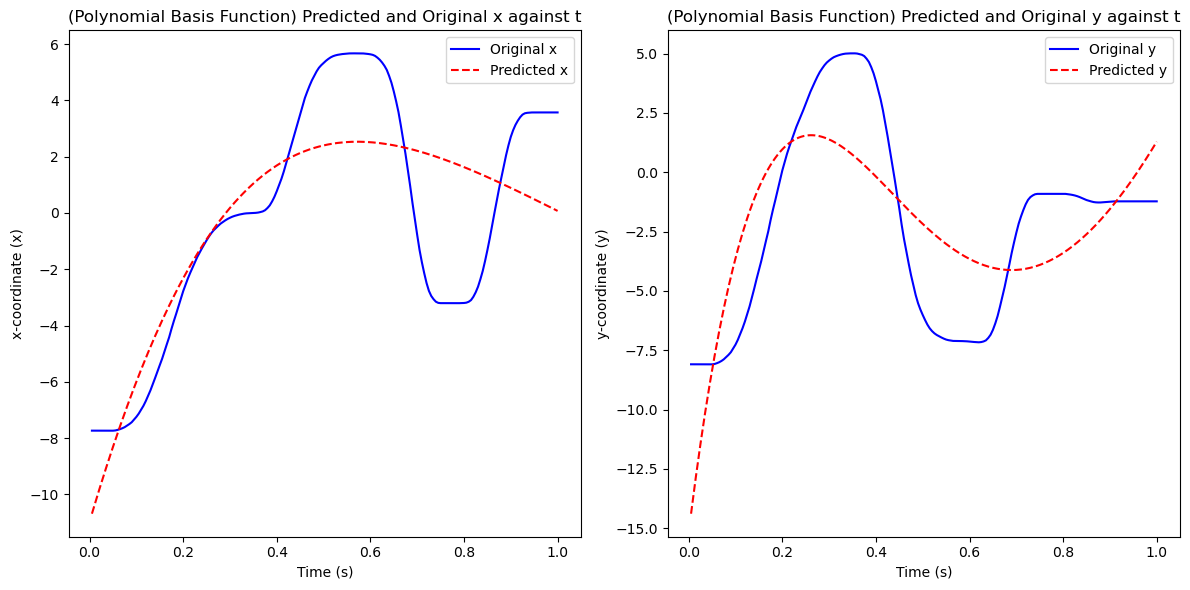

In [13]:
# POLYNOMIAL - Plot original and predicted x-coordinate vs time
plt.figure(figsize=(12, 6))

# Plot t-x (original and predicted)
plt.subplot(1, 2, 1)
plt.plot(t, x, label="Original x", color='blue')
plt.plot(t, poly_predicted_x, label="Predicted x", color='red', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('x-coordinate (x)')
plt.title('(Polynomial Basis Function) Predicted and Original x against t')
plt.legend()

# Plot t-y (original and predicted)
plt.subplot(1, 2, 2)
plt.plot(t, y, label="Original y", color='blue')
plt.plot(t, poly_predicted_y, label="Predicted y", color='red', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('y-coordinate (y)')
plt.title('(Polynomial Basis Function) Predicted and Original y against t')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
df_expo = pd.DataFrame(predict_pos)
df_expo.columns = ['2x','2y']

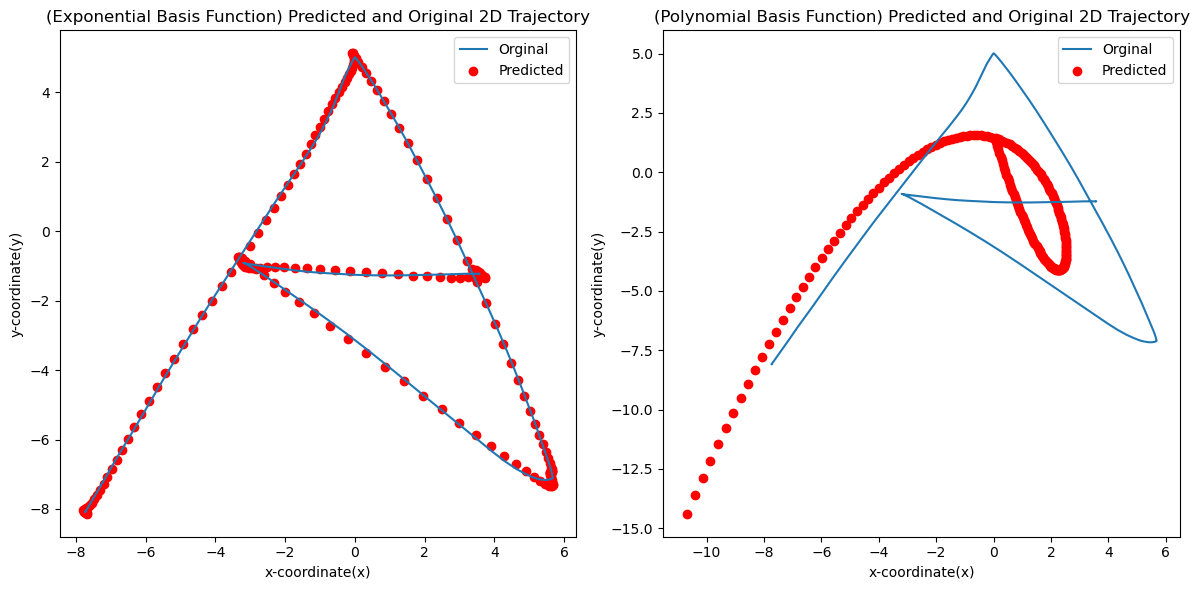

In [15]:
#PART B3

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(x,y, label= 'Orginal')
plt.scatter(predicted_x,predicted_y, label= 'Predicted', color='red')
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('(Exponential Basis Function) Predicted and Original 2D Trajectory')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x,y, label= 'Orginal')
plt.scatter(poly_predicted_x,poly_predicted_y, label= 'Predicted', color='red')
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('(Polynomial Basis Function) Predicted and Original 2D Trajectory')
plt.legend()

plt.tight_layout()
plt.show()

### STEP 3

One set of basis functions appears to deliver much better predictions than the other set of basis functions. On closer inspection you will find that the number of basis functions used in the best predictions is much larger than for the poor predictions. We must compare like with like so modify the code so that you can control the number of basis functions. Then plot both sets of predictions for 2, 5, 10 and 50 basis functions. Show these 2D plots and comment if you can really say that one set of basis functions outperforms the other, qualitatively.

In [16]:
basis_num_2 = 2
basis_num_5 = 5
basis_num_10 = 10 
basis_num = 50 

#2 Basis Numbers
Phi = fit_exponential(basis_num_2, t)  
pos = np.stack([x, y]).T
w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ pos
predict_pos_2 = Phi @ w

df_2 = pd.DataFrame(predict_pos_2)
df_2.columns = ['x','y']
predicted_x_2 = df_2['x']
predicted_y_2 = df_2['y']

#5 Basis Numbers
Phi = fit_exponential(basis_num_5, t)  
pos = np.stack([x, y]).T
w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ pos
predict_pos_5 = Phi @ w

df_5 = pd.DataFrame(predict_pos_5)
df_5.columns = ['x','y']
predicted_x_5 = df_5['x']
predicted_y_5 = df_5['y']

#10 Basis Numbers
Phi = fit_exponential(basis_num_10, t)  
pos = np.stack([x, y]).T
w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ pos
predict_pos_10 = Phi @ w

df_10 = pd.DataFrame(predict_pos_10)
df_10.columns = ['x','y']
predicted_x_10 = df_10['x']
predicted_y_10 = df_10['y']

In [17]:
def new_polynomial_basis_function(t, basis_number):
    # a polynomial basis function
    basis = [np.ones_like(t)]

    for i in range(1, basis_number):
        basis.append(t**i)
    res = np.stack(basis).T
    return res

def new_fit_polynomial(basis_number, t):
    phi_pred = np.zeros((len(t), basis_number))   
    for idx, tt in enumerate(t):
        phi = new_polynomial_basis_function(tt, basis_number)
        addsum = np.sum(phi, axis=-1)
        phi_pred[idx] = phi / addsum
    return phi_pred

In [18]:
basis_number_2 = 2
basis_number_5 = 5
basis_number_10 = 10 
basis_number_50 = 50 

#2 Basis Numbers
Phi = new_fit_polynomial(basis_number_2, t)  
pos = np.stack([x, y]).T
w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ pos
predict_pos_2 = Phi @ w

df_2 = pd.DataFrame(predict_pos_2)
df_2.columns = ['x','y']
poly_predicted_x_2 = df_2['x']
poly_predicted_y_2 = df_2['y']

#5 Basis Numbers
Phi = new_fit_polynomial(basis_number_5, t)  
pos = np.stack([x, y]).T
w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ pos
predict_pos_5 = Phi @ w

df_5 = pd.DataFrame(predict_pos_5)
df_5.columns = ['x','y']
poly_predicted_x_5 = df_5['x']
poly_predicted_y_5 = df_5['y']

#10 Basis Numbers
Phi = new_fit_polynomial(basis_number_10, t)  
pos = np.stack([x, y]).T
w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ pos
predict_pos_10 = Phi @ w

df_10 = pd.DataFrame(predict_pos_10)
df_10.columns = ['x','y']
poly_predicted_x_10 = df_10['x']
poly_predicted_y_10 = df_10['y']

#50 Basis Numbers
Phi = new_fit_polynomial(basis_number_50, t)  
pos = np.stack([x, y]).T
w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ pos
predict_pos_50 = Phi @ w

df_50 = pd.DataFrame(predict_pos_50)
df_50.columns = ['x','y']
poly_predicted_x_50 = df_50['x']
poly_predicted_y_50 = df_50['y']

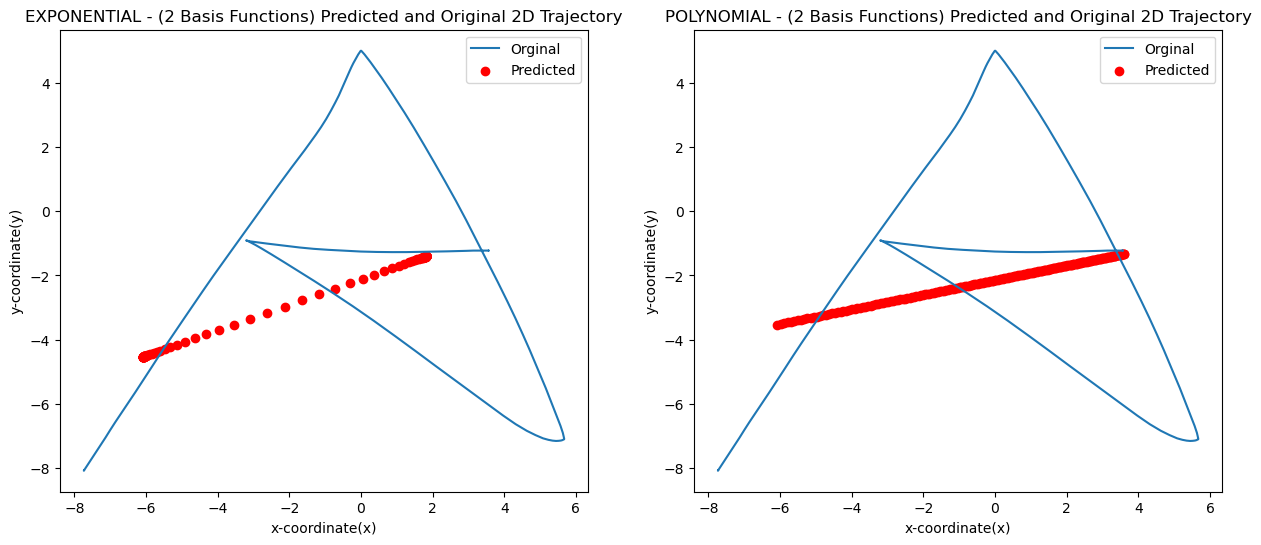

In [19]:
#2 BASIS FUNCTIONS
plt.figure(figsize=(15, 6))

#EXPONENTIAL 
plt.subplot(1,2,1)
plt.plot(x,y, label= 'Orginal')
plt.scatter(predicted_x_2,predicted_y_2, label= 'Predicted', color='red')
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('EXPONENTIAL - (2 Basis Functions) Predicted and Original 2D Trajectory')
plt.legend()

#POLYNOMIAL
plt.subplot(1,2,2)
plt.plot(x,y, label= 'Orginal')
plt.scatter(poly_predicted_x_2,poly_predicted_y_2, label= 'Predicted', color='red')
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('POLYNOMIAL - (2 Basis Functions) Predicted and Original 2D Trajectory')
plt.legend()

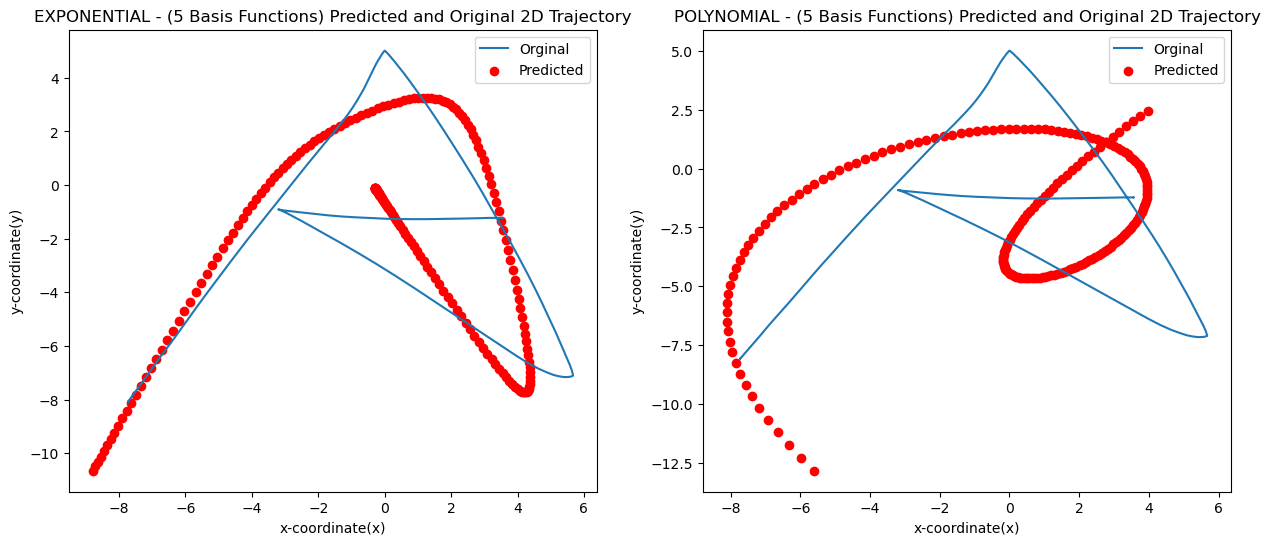

In [20]:
#5 BASIS FUNCTIONS
plt.figure(figsize=(15, 6))

#EXPONENTIAL
plt.subplot(1,2,1)
plt.plot(x,y, label= 'Orginal')
plt.scatter(predicted_x_5,predicted_y_5, label= 'Predicted', color='red')
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('EXPONENTIAL - (5 Basis Functions) Predicted and Original 2D Trajectory')
plt.legend()

#POLYNOMIAL
plt.subplot(1,2,2)
plt.plot(x,y, label= 'Orginal')
plt.scatter(poly_predicted_x_5,poly_predicted_y_5, label= 'Predicted', color='red')
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('POLYNOMIAL - (5 Basis Functions) Predicted and Original 2D Trajectory')
plt.legend()

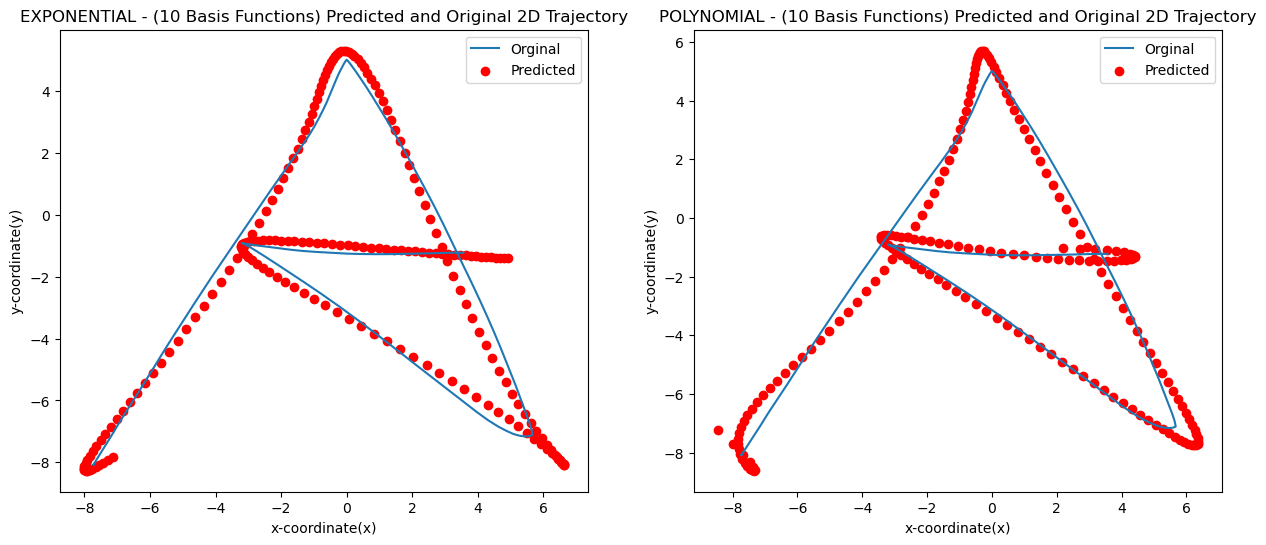

In [21]:
#10 BASIS FUNCTIONS
plt.figure(figsize=(15, 6))

#EXPONENTIAL
plt.subplot(1,2,1)
plt.plot(x,y, label= 'Orginal')
plt.scatter(predicted_x_10,predicted_y_10, label= 'Predicted', color='red')
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('EXPONENTIAL - (10 Basis Functions) Predicted and Original 2D Trajectory')
plt.legend()

#POLYNOMIAL
plt.subplot(1,2,2)
plt.plot(x,y, label= 'Orginal')
plt.scatter(poly_predicted_x_10,poly_predicted_y_10, label= 'Predicted', color='red')
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('POLYNOMIAL - (10 Basis Functions) Predicted and Original 2D Trajectory')
plt.legend()

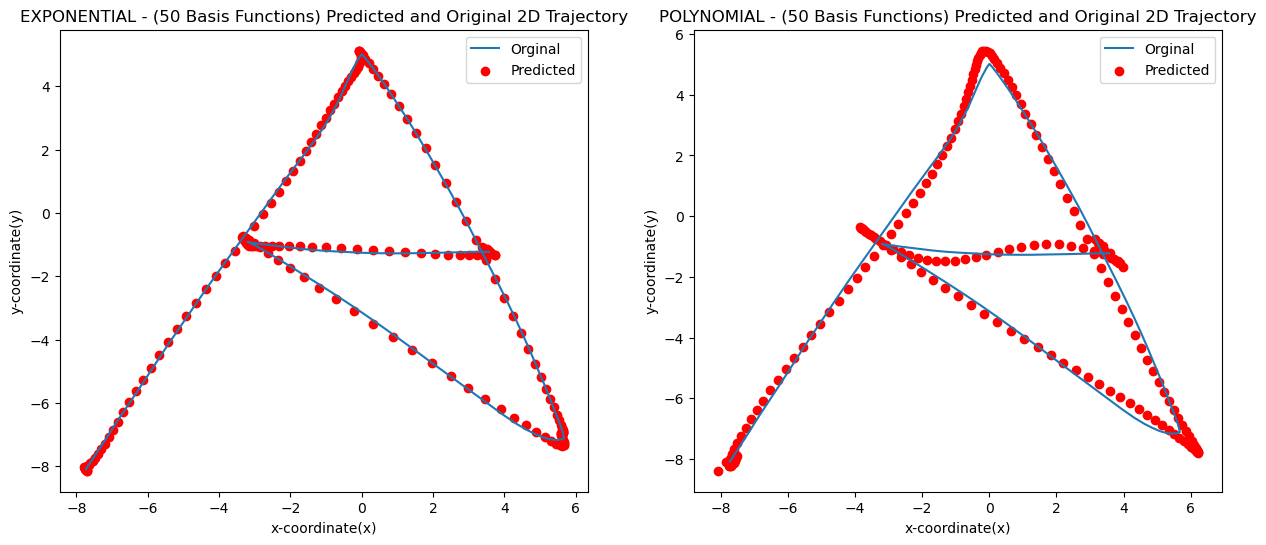

In [22]:
#50 BASIS FUNCTIONS
plt.figure(figsize=(15, 6))

#EXPONENTIAL
plt.subplot(1,2,1)
plt.plot(x,y, label= 'Orginal')
plt.scatter(predicted_x,predicted_y, label= 'Predicted', color='red')
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('EXPONENTIAL - (50 Basis Functions) Predicted and Original 2D Trajectory')
plt.legend()

#POLYNOMIAL
plt.subplot(1,2,2)
plt.plot(x,y, label= 'Orginal')
plt.scatter(poly_predicted_x_50,poly_predicted_y_50, label= 'Predicted', color='red')
plt.xlabel('x-coordinate(x)')
plt.ylabel('y-coordinate(y)')
plt.title('POLYNOMIAL - (50 Basis Functions) Predicted and Original 2D Trajectory')
plt.legend()

### STEP 4

Consider what basis functions (beyond exponential or the polynomial basis functions) might be suitable to model the data "data2.npy". In "data2.npy", the first column is time t while the second column is x-coordinate. You should be able to do this with a small set of basis functions and get a good fit. 

I will plot my prediction and the original data in the same figure (i.e., t-x).

In [23]:
import numpy as np
import pandas as pd

data2 = np.load("data2.npy")
data_2 = pd.DataFrame(data2)
data_2.columns = ['t_2','target']

In [24]:
t = data_2['t_2']
target = data_2['target']

In [25]:
def gaussian_basis_function(basis_num, t):
    t = np.asarray(t)
    x_min, x_max = np.min(t), np.max(t)
    
    centers = np.linspace(x_min, x_max, basis_num)
    sigma = (x_max - x_min) / basis_num  
    phi = np.exp(-0.5 * ((t.reshape(-1, 1) - centers) / sigma) ** 2)    
    return phi

basis_num = 12
gaussian_phi = gaussian_basis_function(basis_num, t)
gaussian_w = np.linalg.pinv(gaussian_phi.T @ gaussian_phi) @ gaussian_phi.T @ target
gaussian_pred = gaussian_phi @ gaussian_w

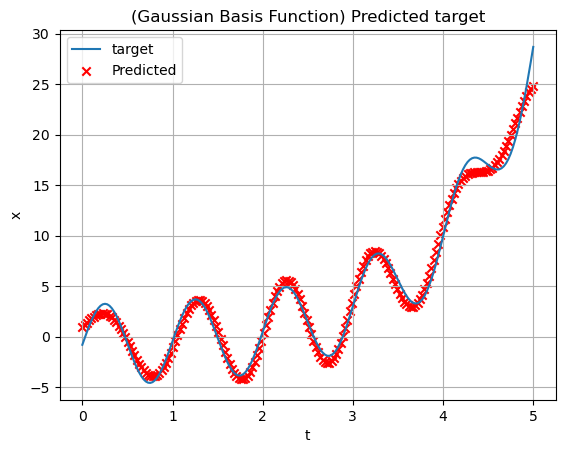

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#  plot the trajectory
data2 = np.load("data2.npy") # size: 200*2, the first column is time input while the second column is x-coordinate.
t_2 = data2[:, 0]
target = data2[:, 1]

plt.plot(t, target, label='target')
plt.scatter(t, gaussian_pred, label='Predicted', color='red', marker='x')
plt.title('(Gaussian Basis Function) Predicted target')
plt.legend()
plt.grid(True)
plt.xlabel("t")
plt.ylabel("x")
plt.show()